<a href="https://colab.research.google.com/github/martin-fabbri/colab-notebooks/blob/master/ensemble-learning/adaboost_from_scratch_01.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# AdaBoost From Scratch

This implementation relies for simplicity on decision tree stums with maximum depth = 1 and 2 leaf nodes.

In [0]:
import numpy as np
import matplotlib.pyplot as plt

from matplotlib.colors import ListedColormap
from sklearn.ensemble import AdaBoostClassifier
from sklearn.ensemble import AdaBoostRegressor
from sklearn.tree import DecisionTreeClassifier
from sklearn.tree import DecisionTreeRegressor
from sklearn.datasets import make_gaussian_quantiles
from sklearn.utils import check_random_state

In [0]:
SEED = 1
plot_colors = 'br'
plot_step = 0.02
class_names = 'AB'

In [3]:

x1, y1 = make_gaussian_quantiles(cov=2, n_samples=200, n_features=2, 
                                 n_classes=2, random_state=SEED)
x2, y2 = make_gaussian_quantiles(mean=(3,3), cov=1.5, n_samples=300, 
                                 n_features=2, n_classes=2, random_state=SEED)

X = np.concatenate((x1, x2))
y = np.concatenate((y1, -y2 + 1))
X.shape, y.shape

((500, 2), (500,))

In [4]:
x_min, x_max = X[:, 0].min() - 1, X[:, 0].max() + 1
y_min, y_max = X[:, 1].min() - 1, X[:, 1].max() + 1
x_min, x_max, y_min, y_max

(-4.950018688068095, 7.712026704298365, -4.935097981925363, 8.848278359647372)

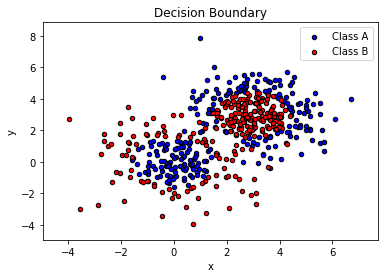

In [5]:
plt.axis('tight')
plt.xlim(x_min, x_max)
plt.ylim(y_min, y_max)
for i, n, c in zip(range(2), class_names, plot_colors):
  idx = np.where(y == i)
  plt.scatter(X[idx, 0], X[idx, 1], c=c, cmap=plt.cm.Paired, s=20, 
              edgecolors='k', label=f'Class {n}')
plt.xlim(x_min, x_max)
plt.ylim(y_min, y_max)
plt.legend(loc='upper right')
plt.xlabel('x')
plt.ylabel('y')
plt.title('Decision Boundary');

In [0]:
xx, yy = np.meshgrid(np.arange(x_min, x_max, plot_step),
                     np.arange(y_min, y_max, plot_step))

In [0]:
bdt = AdaBoostClassifier(DecisionTreeClassifier(max_depth=1),
                         algorithm='SAMME',
                         n_estimators=200)
bdt.fit(X, y)
Z = bdt.predict(np.c_[xx.ravel(), yy.ravel()])
Z = Z.reshape(xx.shape)

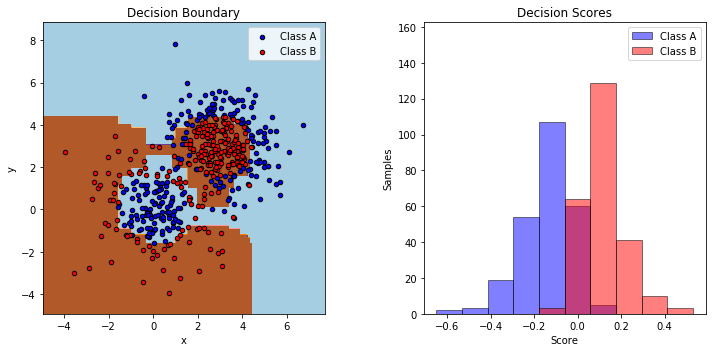

In [8]:
plt.figure(figsize=(10, 5))
plt.subplot(121)

cs = plt.contourf(xx, yy, Z, cmap=plt.cm.Paired)
plt.axis('tight')
plt.xlim(x_min, x_max)
plt.ylim(y_min, y_max)
for i, n, c in zip(range(2), class_names, plot_colors):
  idx = np.where(y == i)
  plt.scatter(X[idx, 0], X[idx, 1], c=c, cmap=plt.cm.Paired, s=20, 
              edgecolors='k', label=f'Class {n}')
plt.xlim(x_min, x_max)
plt.ylim(y_min, y_max)
plt.legend(loc='upper right')
plt.xlabel('x')
plt.ylabel('y')
plt.title('Decision Boundary');

twoclass_output = bdt.decision_function(X)
plot_range = (twoclass_output.min(), twoclass_output.max())
plt.subplot(122)
for i, n, c in zip(range(2), class_names, plot_colors):
    plt.hist(twoclass_output[y == i],
             bins=10,
             range=plot_range,
             facecolor=c,
             label='Class %s' % n,
             alpha=.5,
             edgecolor='k')
x1, x2, y1, y2 = plt.axis()
plt.axis((x1, x2, y1, y2 * 1.2))
plt.legend(loc='upper right')
plt.ylabel('Samples')
plt.xlabel('Score')
plt.title('Decision Scores')

plt.tight_layout()
plt.subplots_adjust(wspace=0.35);


In [9]:
# concepts check

# np.ravel
test_x = np.array([[1, 2, 3], [4, 5, 6]])
print(test_x.ravel())
print(test_x.reshape(-1))
print(np.ravel(test_x, order='F'))
s = np.linspace(0, 1, 5)
print(np.sin(s))
print(np.sin(s).ravel())

# np.newaxis
arr = np.arange(4)
print(arr.shape)
# convert arr to a row vector by insering a new axis
row_vec = arr[np.newaxis, :]
print(row_vec.shape)
print(arr.reshape(1,-1).shape)
# convert arr to a column vector
col_vec = arr[:, np.newaxis]
print(col_vec.shape)

[1 2 3 4 5 6]
[1 2 3 4 5 6]
[1 4 2 5 3 6]
[0.         0.24740396 0.47942554 0.68163876 0.84147098]
[0.         0.24740396 0.47942554 0.68163876 0.84147098]
(4,)
(1, 4)
(1, 4)
(4, 1)


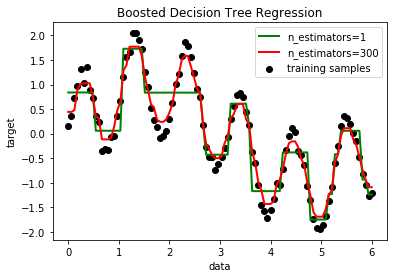

In [10]:
rng = check_random_state(SEED)
X = np.linspace(0, 6, 100)[:, np.newaxis]
noise = rng.normal(0, 0.1, X.shape[0])
y = np.sin(X).ravel() + np.sin(6 * X).ravel() + noise

# for regression model
regr_1 = DecisionTreeRegressor(max_depth=4)
regr_2 = AdaBoostRegressor(DecisionTreeRegressor(max_depth=4), n_estimators=300,
                           random_state=rng)
regr_1.fit(X, y)
regr_2.fit(X, y)

# predict
y_1 = regr_1.predict(X)
y_2 = regr_2.predict(X)

plt.figure()
plt.scatter(X, y, c='k', label='training samples')
plt.plot(X, y_1, c='g', label='n_estimators=1', linewidth=2)
plt.plot(X, y_2, c='r', label='n_estimators=300', linewidth=2)
plt.xlabel('data')
plt.ylabel('target')
plt.title('Boosted Decision Tree Regression')
plt.legend();

## An intuitive explanation of AdaBoost

Let $G_m(x)m=1,2,...,M$ be the sequence of weak classifiers, our objective is to build the following:

$$G(x) = sign(\alpha_1 G_1(x) + \alpha_2 G_2(x) +...+ \alpha_M G_M(x)) = sign(\sum_{m=1}^M\alpha_m G_m(x))$$

- The final prediction is a combination of the predictions from all classifiers through a weighted majority vote

- The coefficients $\alpha_m$ are computed by the boosting algorithm, and weight the contribution of each respective $G_m(x)$. The effects is to give higher influence to the more accurate classifiers in the sequence.

- At each *boosting* step, the data is modified by applying weights $w_1, w_2,..,w_N$ to each training observation. At step $m$ the observations that were *misclassified* previoudly have their weights increased

- Note that at the first step $m=1$ the weights are initialized uniformly $w_i=1/N$




***Algorithm steps:***

1. Initialize the observation weights $w_i=1/N$
2. For $m = 1, 2, 3,..., M$
  - Compute the weighted error [1] $$Err_m=\frac{ \sum_{i-1}^Nw_iI(y^{(i)}\neq G_m(X^{(i)}))}{\sum_{i=1}^Nw_i}$$

  - Compute coefficient [2] $$\alpha_m=log(\frac{1-err_m}{err_m})$$

  - Set data weights [3] $$w_i \leftarrow w_i\,exp[\alpha_mI(y^{(i)} \neq G_m(x^{(i)}))]$$

3. Output $$G(x)=sign[\textstyle \sum_{m=1}^M\alpha_mG_m(x)]$$

## AdaBoost on a toy example

In [0]:
x1 = np.array([.1,.2,.4,.8, .8, .05,.08,.12,.33,.55,.66,.77,.88,.2,.3,.4,.5,.6,.25,.3,.5,.7,.6])
x2 = np.array([.2,.65,.7,.6, .3,.1,.4,.66,.77,.65,.68,.55,.44,.1,.3,.4,.3,.15,.15,.5,.55,.2,.4])
X = np.vstack((x1, x2)).T
y = np.array([1,1,1,1,1,1,1,1,1,1,1,1,1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1])

In [0]:
def plot_decision_boundary(classifier, X, y, N=10, 
                           scatter_weights=np.ones(len(y)),
                           ax=None):
  '''Utility function to plot decision boundary and scatter plot of data'''
  x_min, x_max = X[:, 0].min() - 1, X[:, 0].max() + 1
  y_min, y_max = X[:, 1].min() - 1, X[:, 1].max() + 1
  xx, yy = np.meshgrid(np.arange(x_min, x_max, plot_step),
                       np.arange(y_min, y_max, plot_step))
  if hasattr(classifier, "decision_function"):
    zz = np.array([classifier.decision_function(
        np.array([xi,yi]).reshape(1,-1))
    for  xi, yi in zip(np.ravel(xx), np.ravel(yy))])
  elif hasattr(classifier, "predict_proba"):
    zz = np.array([classifier.predict_proba(
        np.array([xi,yi]).reshape(1,-1))[:,1] 
        for  xi, yi in zip(np.ravel(xx), np.ravel(yy))])
  else:
    zz = np.array([classifier(np.array([xi,yi]).reshape(1,-1))
    for  xi, yi in zip(np.ravel(xx), np.ravel(yy))])

  Z = zz.reshape(xx.shape)
  cm_bright = ListedColormap(['#FF0000', '#0000FF'])
    
  #Get current axis and plot
  if ax is None:
      ax = plt.gca()
  ax.contourf(xx, yy, Z, 2, cmap='RdBu', alpha=.5)
  ax.contour(xx, yy, Z,  2, cmap='RdBu')
  ax.scatter(X[:,0],X[:,1], c = y, cmap = cm_bright, s = scatter_weights * 40)
  ax.set_xlabel('$X_1$')
  ax.set_ylabel('$X_2$')

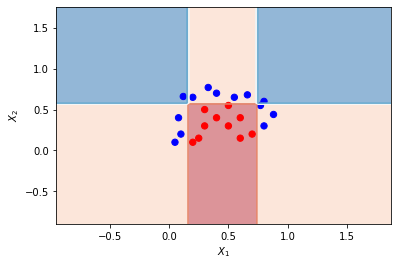

In [13]:
clf = DecisionTreeClassifier(max_depth=1, max_leaf_nodes=2)
boost = AdaBoostClassifier(base_estimator=clf, algorithm='SAMME', 
                           n_estimators=10, learning_rate=1.0)
boost.fit(X, y)
plot_decision_boundary(boost, X, y, N=50);

In [0]:
def AdaBoost(X, y, M=10, learning_rate=1):
  N = len(y)
  estimator_list, y_predict_list, estimator_error_list, estimator_weight_list, sample_weight_list = [], [], [], [], []
  sample_weight = np.ones(N) / N
  sample_weight_list.append(sample_weight.copy())
  for m in range(M):
    # fit a classifier
    estimator = DecisionTreeClassifier(max_depth=1, max_leaf_nodes=2)
    estimator.fit(X, y, sample_weight=sample_weight)
    y_predict = estimator.predict(X)

    # see equation [1]
    incorrect = (y_predict != y)
    estimator_error = np.mean(np.average(incorrect, weights=sample_weight, 
                                         axis=0))
    # boost esrimator weights [2]
    estimator_weight = learning_rate * np.log((1.0 - estimator_error) / 
                                              estimator_error)
    # boost sample weights [3]
    sample_weight *= np.exp(estimator_weight * incorrect * 
                            ((sample_weight > 0) | (estimator_weight < 0)))
    
    # save iteration values
    estimator_list.append(estimator)
    y_predict_list.append(y_predict.copy())
    estimator_error_list.append(estimator_error.copy())
    estimator_weight_list.append(estimator_weight.copy())
    sample_weight_list.append(sample_weight.copy())

  estimator_list = np.asarray(estimator_list)
  y_predict_list = np.asarray(y_predict_list)
  estimator_error_list = np.asarray(estimator_error_list)
  estimator_weight_list = np.asarray(estimator_weight_list)
  sample_weight_list = np.asarray(sample_weight_list)
  
  preds = (np.array([np.sign((y_predict_list[:,point] * estimator_weight_list).sum()) for point in range(N)]))
  print('Accuracy = ', (preds == y).sum() / N) 
    
  return estimator_list, estimator_weight_list, sample_weight_list


In [15]:
estimator_list, estimator_weight_list, sample_weight_list = AdaBoost(X, y, M=10,
                                                                     learning_rate=1)

Accuracy =  1.0


In [0]:
def plot_estimators_boundaries(estimators,estimator_weights, X, y, N = 10,ax = None ):
    
    def AdaBoost_scratch_classify(x_temp, est,est_weights ):
        '''Return classification prediction for a given point X and a previously fitted AdaBoost'''
        temp_pred = np.asarray( [ (e.predict(x_temp)).T* w for e, w in zip(est,est_weights )]  ) / est_weights.sum()
        return np.sign(temp_pred.sum(axis = 0))
    
    
    '''Utility function to plot decision boundary and scatter plot of data'''
    x_min, x_max = X[:, 0].min() - .1, X[:, 0].max() + .1
    y_min, y_max = X[:, 1].min() - .1, X[:, 1].max() + .1
    xx, yy = np.meshgrid( np.linspace(x_min, x_max, N), np.linspace(y_min, y_max, N))


    zz = np.array( [AdaBoost_scratch_classify(np.array([xi,yi]).reshape(1,-1), estimators,estimator_weights ) for  xi, yi in zip(np.ravel(xx), np.ravel(yy)) ] )
            
    # reshape result and plot
    Z = zz.reshape(xx.shape)
    cm_bright = ListedColormap(['#FF0000', '#0000FF'])
    
    if ax is None:
        ax = plt.gca()
    ax.contourf(xx, yy, Z, 2, cmap='RdBu', alpha=.5)
    ax.contour(xx, yy, Z,  2, cmap='RdBu')
    ax.scatter(X[:,0],X[:,1], c = y, cmap = cm_bright)
    ax.set_xlabel('$X_1$')
    ax.set_ylabel('$X_2$')

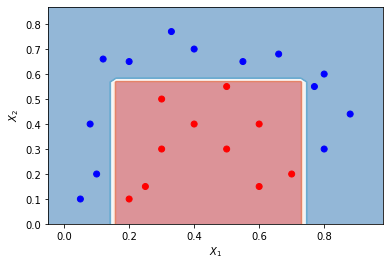

In [17]:
plot_estimators_boundaries(estimator_list, estimator_weight_list, X, y, N = 50 )

Accuracy =  1.0


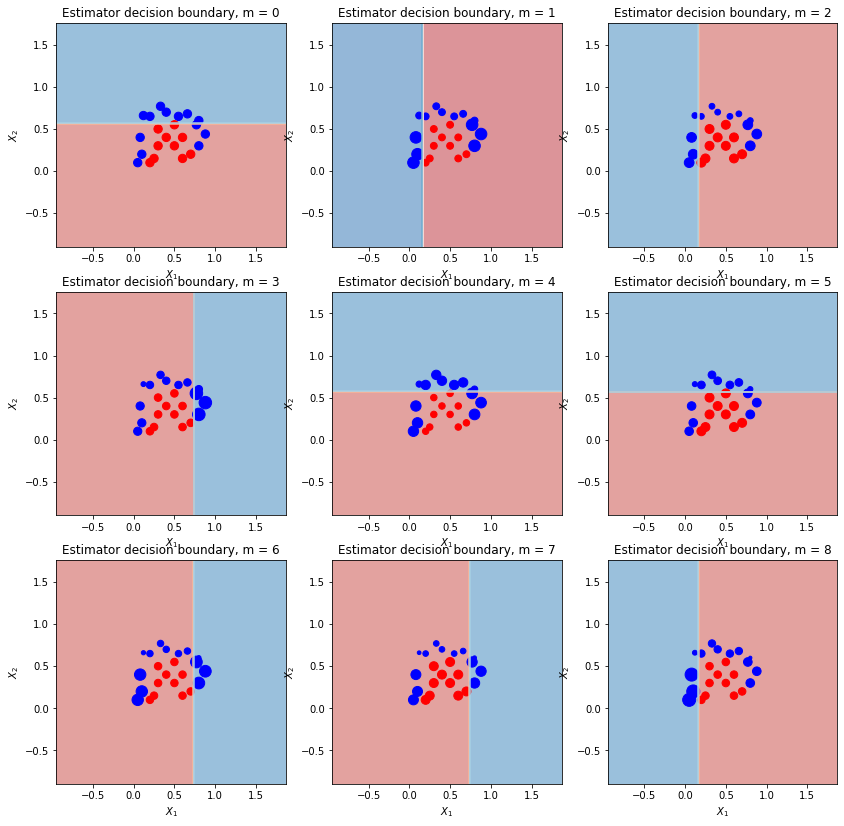

In [19]:
estimator_list, estimator_weight_list, sample_weight_list  = AdaBoost(X,y, M=10, learning_rate = 1)

fig = plt.figure(figsize = (14,14))
for m in range(0,9):
    fig.add_subplot(3,3,m+1)
    s_weights = (sample_weight_list[m,:] / sample_weight_list[m,:].sum() ) * 40
    plot_decision_boundary(estimator_list[m], X,y,N = 50, scatter_weights =s_weights )
    plt.title('Estimator decision boundary, m = {}'.format(m))